In [ ]:
import ants
import numpy as np
import pandas as pd
import os

In [2]:
import numpy as np
def sphere(shape, radius, position):
    """Generate an n-dimensional spherical mask."""
    # assume shape and position have the same length and contain ints
    # the units are pixels / voxels (px for short)
    # radius is a int or float in px
    assert len(position) == len(shape)
    n = len(shape)
    semisizes = (radius,) * len(shape)

    # genereate the grid for the support points
    # centered at the position indicated by position
    grid = [slice(-x0, dim - x0) for x0, dim in zip(position, shape)]
    position = np.ogrid[grid]
    # calculate the distance of all points from `position` center
    # scaled by the radius
    arr = np.zeros(shape, dtype=float)
    for x_i, semisize in zip(position, semisizes):
        # this can be generalized for exponent != 2
        # in which case `(x_i / semisize)`
        # would become `np.abs(x_i / semisize)`
        arr += (x_i / semisize) ** 2

    # the inner part of the sphere will have distance below or equal to 1
    return arr <= 1.0

In [3]:
brain_size = (64,64,64)

In [ ]:
#tried to make it into a function but didnt finish brain is mush
def alterBrain(temp, coords, sz1, sz2):
    sphere_small = temp.new_image_like(sphere(shape=brain_size, radius=sz1, position=coords)*1.0)
    sphere_big = temp.new_image_like(sphere(shape=brain_size, radius=sz2, position=coords)*1.0)
    mytx = ants.registration(fixed=sphere_big, moving=sphere_small,mask=sphere_big,type_of_transform = 'SyNOnly' )
    alteredBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0])
    print(mytx['fwdtransforms'][0])
    alteredBrain.plot_ortho(flat=True,xyz=coords)
    ofn = '../../BC-sim/Warped_Brains/TD-sub-0001.nii.gz'
    warpedBrain.to_file(ofn) #save it

In [ ]:
# Create list of file names to loop through
# 
For s in list:
    temp = ants.image_read(f'../../BC-sim/{s}.nii.gz')
    temp = ants.resample_image(image=temp,resample_params=brain_size,use_voxels=True,interp_type=1)
    temp = temp.iMath_normalize()
    temp.plot_ortho(flat=True,xyz_lines=False)
#    alterBrain(temp, coords)

In [5]:
temp = ants.image_read('../../BC-sim/sub-0010001_Extracted_Brain-Copy1.nii.gz')
temp = ants.resample_image(image=temp,resample_params=brain_size,use_voxels=True,interp_type=1)
temp = temp.iMath_normalize()

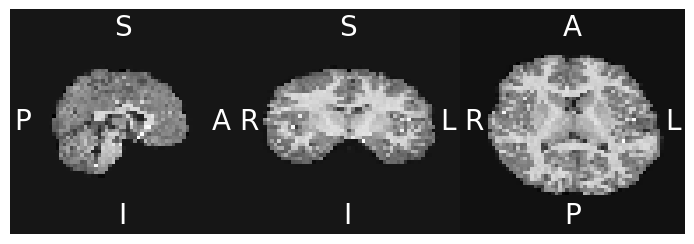

In [6]:
temp.plot_ortho(flat=True,xyz_lines=False)

In [8]:
coords = (32,32,40)

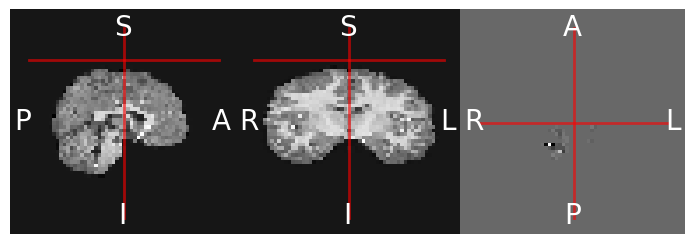

In [9]:
temp.plot_ortho(flat=True,xyz=coords)

In [12]:
sphere_small = temp.new_image_like(sphere(shape=brain_size, radius=2, position=coords)*1.0)
sphere_big = temp.new_image_like(sphere(shape=brain_size, radius=8, position=coords)*1.0)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



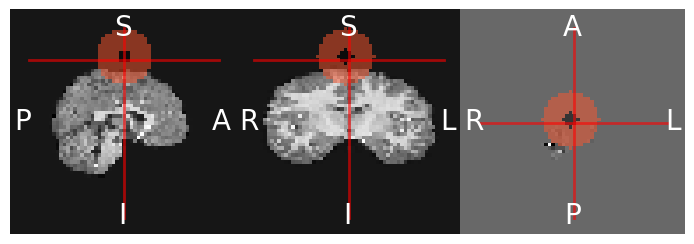

In [13]:
temp.plot_ortho(sphere_small*3+sphere_big*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5)

In [14]:
mytx = ants.registration(fixed=sphere_big, moving=sphere_small,mask=sphere_big,type_of_transform = 'SyNOnly' )

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



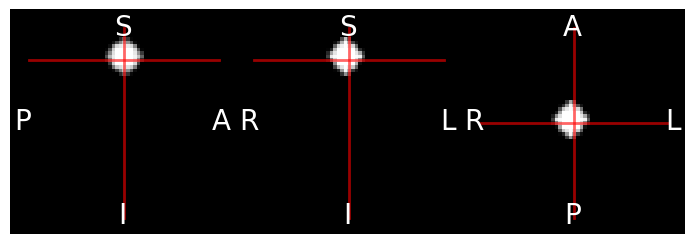

In [15]:
mytx['warpedmovout'].plot_ortho(flat=True,xyz=coords)

/tmp/tmplzq182u01Warp.nii.gz


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



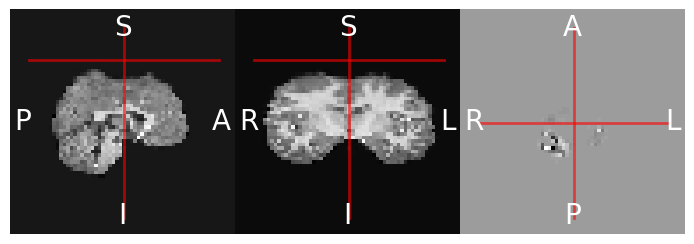

In [16]:
warpedBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0])
print(mytx['fwdtransforms'][0])
warpedBrain.plot_ortho(flat=True,xyz=coords)

In [19]:
ofn = '../../BC-sim/Warped_Brains/TD-sub-0001.nii.gz'
warpedBrain.to_file(ofn) #save it